# **Get csv file using tweepy and twitter API**

In [ ]:
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
import socket
import json
import csv
import pandas as pd
from pandas import ExcelWriter

#Twitter API credentials
consumer_key = "ttoOZ8L8PmEOXpTXYa136fLbL"
consumer_secret = "6krQv2mXYyUAOIOFat6byi2IOzZSuSBMHi1SccXK0QWuQ6I0Ef"
access_key = "1526554944345866240-uo9FZuzaNLpkdUNGMzoFJz9UfXdPWj"
access_secret = "3GFeEfFSTpU97e0zRVEsC0YIdlFIEWuFeFAp7jQcr6PQo"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
def crawltweets(search_tweet):
    data_tweets = pd.DataFrame(columns=['Date', 'Tweet'])
    tweets = tweepy.Cursor(
                    api.search, q=search_tweet, lang="en", tweet_mode='extended').items(500)
    list_tweet = [tweet for tweet in tweets]

    for tweet in list_tweet:
        Date = tweet.created_at
        try:
            Tweet = tweet.retweeted_status.full_text
        except AttributeError:
            Tweet = tweet.full_text
        ith_tweet = [Date, Tweet]
        data_tweets.loc[len(data_tweets)] = ith_tweet
    
    print('Crawling is Done =', len(data_tweets))
    namafile = 'racism.csv'
    data_tweets.to_csv(namafile, index=False)

search_tweet = "racism"
crawltweets(search_tweet)

Crawling is Done = 500


In [ ]:
import pandas as pd
df = pd.read_csv('racism.csv')
df

,Date,Tweet
0,2022-06-04 04:13:01,"It's worth repeating. \n\nWh.ite people, you c..."
1,2022-06-04 04:13:00,@maggieNYT trumpism isn't politics. It’s a lon...
2,2022-06-04 04:12:54,Caribbean Matters: Leaked Windrush report high...
3,2022-06-04 04:12:50,@jasonhickel @SusanCa71410716 The Legacy of Qu...
4,2022-06-04 04:12:47,Idk how people believe racism is real but don’...
...,...,...
495,2022-06-04 03:46:23,@BillFOXLA @FoxNews What Boudin meant to say b...
496,2022-06-04 03:46:18,@JokinenMark @DAJensen07 @antifaoperative Hitl...
497,2022-06-04 03:46:18,@CorinneBusche The irony of this guy complaini...
498,2022-06-04 03:46:18,California's task force on reparations release...


# **Data Preparation**

In [ ]:
import re, string, unicodedata
import json
import nltk
import json
import time
import itertools  
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import tensorflow.keras.preprocessing.text as kpt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
import pandas as pd
df = pd.read_csv('racism.csv')
df

,Date,Tweet
0,2022-06-04 04:13:01,"It's worth repeating. \n\nWh.ite people, you c..."
1,2022-06-04 04:13:00,@maggieNYT trumpism isn't politics. It’s a lon...
2,2022-06-04 04:12:54,Caribbean Matters: Leaked Windrush report high...
3,2022-06-04 04:12:50,@jasonhickel @SusanCa71410716 The Legacy of Qu...
4,2022-06-04 04:12:47,Idk how people believe racism is real but don’...
...,...,...
495,2022-06-04 03:46:23,@BillFOXLA @FoxNews What Boudin meant to say b...
496,2022-06-04 03:46:18,@JokinenMark @DAJensen07 @antifaoperative Hitl...
497,2022-06-04 03:46:18,@CorinneBusche The irony of this guy complaini...
498,2022-06-04 03:46:18,California's task force on reparations release...


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\s*\d+\s*', '', text)
    text = re.sub('/[^\w\s]/gi', '', text)
    text = re.sub("@[^0-9a-zA-Z]+", '',text)
    text = re.sub(r'@[^\s]+', ' ', text)
    text = re.sub(r'#[^\w]+', ' ', text)
    text = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text)
    text = re.sub('  +', ' ', text) 
    text = re.sub('\n+',' ',text)
    text = re.sub('\ ■',' ',text)
    text = re.sub(r'&[^\s]+', ' ', text)
    text = re.sub(r"\'s", " \'s", text)
    text = re.sub(r"\'ve", " \'ve", text)
    text = re.sub(r"n\'t", " n\'t", text)
    text = re.sub(r"\'re", " \'re", text)
    text = re.sub(r"\'d", " \'d", text)
    text = re.sub(r"\'ll", " \'ll", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\(", " ", text)
    text = re.sub(r"\)", " ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", text)
    text = re.sub(r'[^\x00-\x7F]+', "", text)
    text = re.sub('rt ', '', text)
    text = re.sub('|', '', text)

    return text

In [ ]:
df['text_clean'] = df['Tweet'].apply(clean_text)
pd.set_option('display.max_columns', None)
df.head(1)

,Date,Tweet,text_clean
0,2022-06-04 04:13:01,"It's worth repeating. \n\nWh.ite people, you c...",its worth repeating white people you created c...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['text_clean'] = df['text_clean'].apply(remove_stopwords)
df.head()

,Date,Tweet,text_clean
0,2022-06-04 04:13:01,"It's worth repeating. \n\nWh.ite people, you c...",worth repeating white people created casual ra...
1,2022-06-04 04:13:00,@maggieNYT trumpism isn't politics. It’s a lon...,maggienyt trumpism isnt politics longstanding ...
2,2022-06-04 04:12:54,Caribbean Matters: Leaked Windrush report high...,caribbean matters leaked windrush repohighligh...
3,2022-06-04 04:12:50,@jasonhickel @SusanCa71410716 The Legacy of Qu...,jasonhickel legacy queen elizabeth ii colonial...
4,2022-06-04 04:12:47,Idk how people believe racism is real but don’...,idk people believe racism real dont believe co...


In [ ]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [ ]:
df['text_clean'] = df['text_clean'].apply(stemm_text)
df.head()

,Date,Tweet,text_clean
0,2022-06-04 04:13:01,"It's worth repeating. \n\nWh.ite people, you c...",worth repeat white peopl creat casual racism i...
1,2022-06-04 04:13:00,@maggieNYT trumpism isn't politics. It’s a lon...,maggienyt trumpism isnt polit longstand violen...
2,2022-06-04 04:12:54,Caribbean Matters: Leaked Windrush report high...,caribbean matter leak windrush repohighlight u...
3,2022-06-04 04:12:50,@jasonhickel @SusanCa71410716 The Legacy of Qu...,jasonhickel legaci queen elizabeth ii colonial...
4,2022-06-04 04:12:47,Idk how people believe racism is real but don’...,idk peopl believ racism real dont believ color...


In [ ]:
df = df.drop(columns=['Date']) 

In [ ]:
print(df.text_clean)

0      worth repeat white peopl creat casual racism i...
1      maggienyt trumpism isnt polit longstand violen...
2      caribbean matter leak windrush repohighlight u...
3      jasonhickel legaci queen elizabeth ii colonial...
4      idk peopl believ racism real dont believ color...
                             ...                        
495    billfoxla foxnew boudin meant say didnt crime ...
496    jokinenmark antifaop hitler nationalist show g...
497    corinnebusch ironi guy complain woke media one...
498    california task forc repar releas repodetail d...
499    thing could make illeg pick drug thing use mak...
Name: text_clean, Length: 500, dtype: object


In [ ]:
def filtering(text_clean):
    #remove link web
    text_clean = re.sub(r'https*\S+', ' ', str(text_clean))
    #remove @username
    text_clean = re.sub(r'@[^\s]+', ' ', text_clean)
    #remove #tagger
    text_clean = re.sub(r'#[^\w]+', ' ', text_clean)
    text_clean = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text_clean)
    #remove extra spaces
    text_clean = re.sub('  +', ' ', text_clean) 
    #remove \n
    text_clean = re.sub('\n+',' ',text_clean)
    text_clean = re.sub('\ ■',' ',text_clean)
    text_clean = re.sub(r'&[^\s]+', ' ', text_clean)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text_clean = emoji_pattern.sub(r'', text_clean)
    return text_clean

In [ ]:
print(df.text_clean)

0      worth repeat white peopl creat casual racism i...
1      maggienyt trumpism isnt polit longstand violen...
2      caribbean matter leak windrush repohighlight u...
3      jasonhickel legaci queen elizabeth ii colonial...
4      idk peopl believ racism real dont believ color...
                             ...                        
495    billfoxla foxnew boudin meant say didnt crime ...
496    jokinenmark antifaop hitler nationalist show g...
497    corinnebusch ironi guy complain woke media one...
498    california task forc repar releas repodetail d...
499    thing could make illeg pick drug thing use mak...
Name: text_clean, Length: 500, dtype: object


In [ ]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text

In [ ]:
df['text_clean'] = df['text_clean'].apply(preprocess_data)
df.head()

,Unnamed: 0,text_clean
0,0,worth repeat white peopl creat casual racism i...
1,1,maggienyt trumpism isnt polit longstand violen...
2,2,caribbean matter leak windrush repohighlight u...
3,3,jasonhickel legaci queen elizabeth ii colonial...
4,4,idk peopl believ racism real dont believ color...


In [ ]:
df.text_clean.to_csv('clean_data.csv') 

# **Vader Sentiment Analysis**

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import re

In [ ]:
import pandas as pd
df = pd.read_csv('clean_data.csv')
df

,Unnamed: 0,text_clean
0,0,worth repeat white peopl creat casual racism i...
1,1,maggienyt trumpism isnt polit longstand violen...
2,2,caribbean matter leak windrush repohighlight u...
3,3,jasonhickel legaci queen elizabeth ii colonial...
4,4,idk peopl believ racism real dont believ color...
...,...,...
495,495,billfoxla foxnew boudin meant say didnt crime ...
496,496,jokinenmark antifaop hitler nationalist show g...
497,497,corinnebusch ironi guy complain woke media one...
498,498,california task forc repar relea repodetail da...


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
scores = []
# Declare variables for scores
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text_clean'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    pos = analyzer.polarity_scores(df['text_clean'][i])["pos"]
    neu = analyzer.polarity_scores(df['text_clean'][i])["neu"]
    neg = analyzer.polarity_scores(df['text_clean'][i])["neg"]
    
    scores.append({
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
def vader_analysis(compound):
    if compound >=  0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['vaderSentiment']
df.head()

,Unnamed: 0,text_clean,Compound,Positive,Negative,Neutral,Vader Sentiment,vaderSentiment
0,0,worth repeat white peopl creat casual racism i...,-0.9274,0.109,0.450,0.441,-0.9274,Negative
1,1,maggienyt trumpism isnt polit longstand violen...,-0.8750,0.000,0.294,0.706,-0.8750,Negative
2,2,caribbean matter leak windrush repohighlight u...,-0.7506,0.075,0.445,0.479,-0.7506,Negative
3,3,jasonhickel legaci queen elizabeth ii colonial...,0.0000,0.000,0.000,1.000,0.0000,Neutral
4,4,idk peopl believ racism real dont believ color...,-0.6705,0.000,0.440,0.560,-0.6705,Negative


In [ ]:
#hapus kolom Vader Sentiment karena sama dengan kolom Compound
df.drop(['Vader Sentiment'], axis=1)

,Unnamed: 0,text_clean,Compound,Positive,Negative,Neutral,vaderSentiment
0,0,worth repeat white peopl creat casual racism i...,-0.9274,0.109,0.450,0.441,Negative
1,1,maggienyt trumpism isnt polit longstand violen...,-0.8750,0.000,0.294,0.706,Negative
2,2,caribbean matter leak windrush repohighlight u...,-0.7506,0.075,0.445,0.479,Negative
3,3,jasonhickel legaci queen elizabeth ii colonial...,0.0000,0.000,0.000,1.000,Neutral
4,4,idk peopl believ racism real dont believ color...,-0.6705,0.000,0.440,0.560,Negative
...,...,...,...,...,...,...,...
495,495,billfoxla foxnew boudin meant say didnt crime ...,-0.7543,0.144,0.292,0.564,Negative
496,496,jokinenmark antifaop hitler nationalist show g...,0.3612,0.319,0.198,0.483,Neutral
497,497,corinnebusch ironi guy complain woke media one...,-0.7845,0.074,0.277,0.649,Negative
498,498,california task forc repar relea repodetail da...,-0.3818,0.087,0.143,0.769,Neutral


In [ ]:
vader_counts = df['vaderSentiment'].value_counts()
vader_counts

Negative    353
Neutral     134
Positive     13
Name: vaderSentiment, dtype: int64

# **Data Visualization**

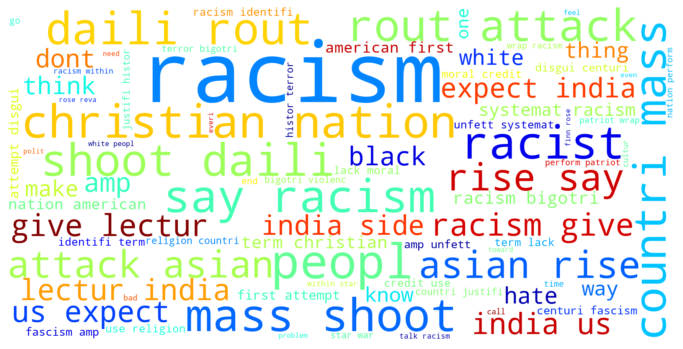

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df['text_clean'])

([<matplotlib.patches.Wedge at 0x7f9219b04210>,
 [Text(-0.6632224143508425, 0.8775739450910331, 'Negative'),
  Text(0.5894093214328248, -0.9287608151769202, 'Neutral'),
  Text(1.3454989871911922, -0.11014751684661939, 'Positive')],
 [Text(-0.36175768055500496, 0.4786766973223816, '70.6%'),
  Text(0.32149599350881347, -0.5065968082783201, '26.8%'),
  Text(0.8471660289722319, -0.06935214023676035, '2.6%')])

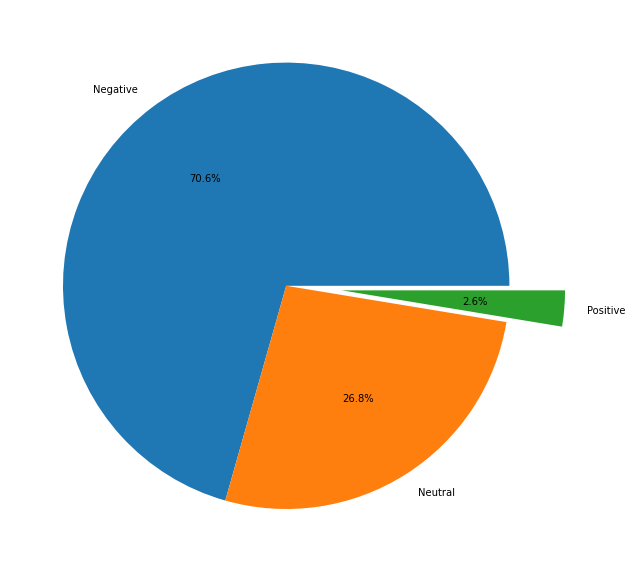

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,27))
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)